In [620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [621]:
pd.set_option('display.max_columns', None)

In [622]:
df = pd.read_csv('../data/d01_raw/train.csv')

C:\Users\vinic\AppData\Local\Temp\ipykernel_11160\2275389496.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/d01_raw/train.csv')


In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [624]:
df.loc[df.Age.isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [625]:
# df.Age.astype(int)

In [626]:
non_numeric_mask = ~df.Age.str.isdigit()

In [627]:
non_numeric_values = df.loc[non_numeric_mask]
non_numeric_values

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
54,0x1650,CUS_0x284a,July,Nadiaq,34_,#F%$D@*&8,Lawyer,10909427.0,NaN,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
58,0x1658,CUS_0x5407,March,Annk,30_,500-92-6408,Media_Manager,34081.38,NaN,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",31,14,17.13,5.0,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.7207654954979,Low_spent_Large_value_payments,260.9124018324295,Poor
71,0x1669,CUS_0x4157,August,Charlie Zhur,24_,070-19-1622,Doctor,114838.41,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11,8.24,8.0,Good,1377.74,27.813354,21 Years and 11 Months,No,226.892792,254.57176724837916,High_spent_Large_value_payments,742.9221908300779,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99933,0x25f8b,CUS_0xb11c,June,Yinka Adegokej,38_,546-94-4789,Manager,15319.65,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,6.0,Bad,1453.61,24.846424,11 Years and 2 Months,Yes,28.182033,45.61171819143637,High_spent_Small_value_payments,332.269998,Standard
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500,226-45-0652,_______,22620.79,1722.065833,7,3,9,0_,NaN,25,NaN,5.31,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48_,#F%$D@*&8,Developer,22620.79,1722.065833,6,2,9,0,NaN,27,17,1.3099999999999996,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,-500,340-85-7301,Lawyer,42903.79,NaN,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


In [628]:
df['Age'] = df['Age'].str.replace(r'[^0-9]', '', regex=True) #tirar valores da idade com __

In [629]:
non_numeric_values = df.loc[non_numeric_mask]
non_numeric_values

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
54,0x1650,CUS_0x284a,July,Nadiaq,34,#F%$D@*&8,Lawyer,10909427.0,NaN,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
58,0x1658,CUS_0x5407,March,Annk,30,500-92-6408,Media_Manager,34081.38,NaN,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",31,14,17.13,5.0,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.7207654954979,Low_spent_Large_value_payments,260.9124018324295,Poor
71,0x1669,CUS_0x4157,August,Charlie Zhur,24,070-19-1622,Doctor,114838.41,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11,8.24,8.0,Good,1377.74,27.813354,21 Years and 11 Months,No,226.892792,254.57176724837916,High_spent_Large_value_payments,742.9221908300779,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99933,0x25f8b,CUS_0xb11c,June,Yinka Adegokej,38,546-94-4789,Manager,15319.65,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,6.0,Bad,1453.61,24.846424,11 Years and 2 Months,Yes,28.182033,45.61171819143637,High_spent_Small_value_payments,332.269998,Standard
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,500,226-45-0652,_______,22620.79,1722.065833,7,3,9,0_,NaN,25,NaN,5.31,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,#F%$D@*&8,Developer,22620.79,1722.065833,6,2,9,0,NaN,27,17,1.3099999999999996,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,500,340-85-7301,Lawyer,42903.79,NaN,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


In [630]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [631]:
df.Age = df.Age.astype(int)

In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [633]:
df["Age"].loc[df["Age"] > 100].value_counts()

Age
500     886
6799      4
4307      3
1692      3
2980      3
       ... 
7178      1
5621      1
1908      1
4583      1
1342      1
Name: count, Length: 1682, dtype: int64

In [634]:
Q1 = df['Age'].quantile(0.25) # primeiro quartil (pega os valores de 25% para baixo)
Q3 = df['Age'].quantile(0.95) # terceiro quartil (pega os valores de 95% para baixo)
IQR = Q3 - Q1 # calcula a diferença entre o primeiro e o terceiro quartil

In [635]:
Q1

25.0

In [636]:
Q3

54.0

In [637]:
IQR

29.0

In [638]:
upper_bound = Q3 + 1.5 * IQR


In [639]:
upper_bound

97.5

In [640]:
df.loc[df['Age'] > upper_bound]["Age"].value_counts()

Age
500     886
6799      4
4307      3
1692      3
2980      3
       ... 
5621      1
1908      1
4583      1
7549      1
1342      1
Name: count, Length: 1684, dtype: int64

In [641]:
df['Age'] = df['Age'].apply(lambda x:  ceil(upper_bound) if x > upper_bound else x) # Alteração de outliers

In [642]:
df.loc[df["Age"] == ceil(upper_bound)]['Age'].value_counts()

Age
98    2778
Name: count, dtype: int64

In [643]:
df.loc[df["Age"] == ceil(upper_bound)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
56,0x1656,CUS_0x5407,January,Annk,98,500-92-6408,Media_Manager,34081.38_,NaN,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",30,11,17.13,5.0,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
113,0x16ab,CUS_0xff4,February,NaN,98,655-05-7666,Entrepreneur,25546.26,NaN,8,7,14,5,"Not Specified, Student Loan, Student Loan, Cre...",16,13,7.83,NaN,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
122,0x16b8,CUS_0x33d2,March,Chalmersa,98,965-46-2491,Scientist,31993.78,2942.148333,6,6,7,2,"Payday Loan, and Home Equity Loan",8,14,10.28,1.0,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.25708850339777,Low_spent_Small_value_payments,274.8164466052998,Standard
219,0x1749,CUS_0x3edc,April,Williamso,98,663-16-3845,Accountant,43070.24,3622.186667,3,3,18,1,Debt Consolidation Loan,11,8,8.97,4.0,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487328841,High_spent_Medium_value_payments,506.7222069702167,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,98,683-59-7399,Media_Manager,20059.98,1523.665000,8,5,12,4,"Home Equity Loan, Payday Loan, Not Specified, ...",25,11,2.97,3.0,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.71358019803843,High_spent_Small_value_payments,292.576093,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,98,226-45-0652,_______,22620.79,1722.065833,7,3,9,0_,NaN,25,NaN,5.31,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99950,0x25fa4,CUS_0x51b3,July,Ryana,98,837-85-9800,Media_Manager,59146.36,4908.863333,3,6,6,1,Personal Loan,8,6,6.68,5.0,_,418.03,38.199635,20 Years and 7 Months,No,26.778419,502.3763201756033,Low_spent_Small_value_payments,251.731594,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,98,340-85-7301,Lawyer,42903.79,NaN,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


In [644]:
month_dic = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6,
    'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12
}

In [645]:
df["Number_Month"] = df["Month"].str.lower().map(month_dic) # Criação da coluna para indentificar os meses em números

In [646]:
df["Number_Month"].value_counts()

Number_Month
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: count, dtype: int64

In [647]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [649]:
df.loc[df["Name"].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,8
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6,7.1,3.0,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good,2
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard,7
64,0x1662,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838.41,9843.867500,2,5,7,-100,"Personal Loan, Debt Consolidation Loan, and Au...",13,11,8.24,3.0,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.19351594560425,High_spent_Small_value_payments,802.3004421328528,Good,1
80,0x167a,CUS_0xa66b,January,NaN,40,221-30-8554,Teacher,33751.27,2948.605833,5,5,20,3_,"Credit-Builder Loan, Personal Loan, and Auto Loan",16,20,11.0,4.0,Standard,1328.93,37.089076,19 Years and 2 Months,NM,65.008174,117.30669710658556,High_spent_Medium_value_payments,362.54571194023237,Standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,0x25fba,CUS_0x372c,May,NaN,18,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good,5
99965,0x25fbb,CUS_0x372c,June,NaN,19,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,14,-1,5.1,1.0,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good,6
99969,0x25fc3,CUS_0xf16,February,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,1,5,-100,"Payday Loan, Student Loan, Mortgage Loan, and ...",3,0,5.69,4.0,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good,2
99973,0x25fc7,CUS_0xf16,June,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,NaN,0.6900000000000004,8.0,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,__10000__,Low_spent_Small_value_payments,233.301539,Good,6


In [650]:
name_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Name'].isna()) | ~(x['Name'].isna())])
#Agrupar o dado pelo customer_id para verificar caso exista algum dado com nome nulo e outro dado com um nome cadastrado
name_null


C:\Users\vinic\AppData\Local\Temp\ipykernel_11160\3819400334.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  name_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Name'].isna()) | ~(x['Name'].isna())])


ID Customer_ID     Month            Name  Age  \
Customer_ID                                                             
CUS_0x1000  56752  0x1628a  CUS_0x1000   January  Alistair Barrf   17   
            56753  0x1628b  CUS_0x1000  February             NaN   17   
            56754  0x1628c  CUS_0x1000     March  Alistair Barrf   17   
            56755  0x1628d  CUS_0x1000     April  Alistair Barrf   17   
            56756  0x1628e  CUS_0x1000       May  Alistair Barrf   17   
...                    ...         ...       ...             ...  ...   
CUS_0xffd   99155  0x25afd   CUS_0xffd     April        Damouniq   29   
            99156  0x25afe   CUS_0xffd       May        Damouniq   29   
            99157  0x25aff   CUS_0xffd      June             NaN   29   
            99158  0x25b00   CUS_0xffd      July        Damouniq   30   
            99159  0x25b01   CUS_0xffd    August        Damouniq   30   

                           SSN Occupation Annual_Income  \
Customer_ID                                               
CUS_0x1000  56752  913-74-1218     Lawyer      30625.94   
            56753  913-74-1218     Lawyer      30625.94   
            56754  913-74-1218     Lawyer     30625.94_   
            56755  913-74-1218     Lawyer      30625.94   
            56756  913-74-1218     Lawyer      30625.94   
...                        ...        ...           ...   
CUS_0xffd   99155  832-88-8320  Scientist      41398.44   
            99156  832-88-8320    _______      41398.44   
            99157  832-88-8320  Scientist      41398.44   
            99158  832-88-8320  Scientist     41398.44_   
            99159  832-88-8320  Scientist      41398.44   

                   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
Customer_ID                                                                    
CUS_0x1000  56752            2706.161667                  6                5   
            56753                    NaN                  6                5   
            56754            2706.161667                  6                5   
            56755            2706.161667                  6                5   
            56756            2706.161667                  6                5   
...                                  ...                ...              ...   
CUS_0xffd   99155            3749.870000                  8                7   
            99156            3749.870000                  8                7   
            99157                    NaN                  8                7   
            99158            3749.870000                  8                7   
            99159            3749.870000                  8                7   

                   Interest_Rate Num_of_Loan  \
Customer_ID                                    
CUS_0x1000  56752             27           2   
            56753             27           2   
            56754             27           2   
            56755             27           2   
            56756             27           2   
...                          ...         ...   
CUS_0xffd   99155             13        -100   
            99156             13          6_   
            99157             13           6   
            99158             13           6   
            99159             13           6   

                                                        Type_of_Loan  \
Customer_ID                                                            
CUS_0x1000  56752          Credit-Builder Loan, and Home Equity Loan   
            56753          Credit-Builder Loan, and Home Equity Loan   
            56754          Credit-Builder Loan, and Home Equity Loan   
            56755          Credit-Builder Loan, and Home Equity Loan   
            56756          Credit-Builder Loan, and Home Equity Loan   
...                                                              ...   
CUS_0xffd   99155  Auto Loan, Payday Loan, Payday Loan, Mortgage

In [651]:
df['Name'] = df.groupby('Customer_ID')['Name'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill')) # Preencher os nomes nuloes com os valores corretos

C:\Users\vinic\AppData\Local\Temp\ipykernel_11160\1027273222.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Name'] = df.groupby('Customer_ID')['Name'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill')) # Preencher os nomes nuloes com os valores corretos


In [652]:
name_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Name'].isna()) | ~(x['Name'].isna())])
name_null

C:\Users\vinic\AppData\Local\Temp\ipykernel_11160\744891109.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  name_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Name'].isna()) | ~(x['Name'].isna())])


ID Customer_ID     Month            Name  Age  \
Customer_ID                                                             
CUS_0x1000  56752  0x1628a  CUS_0x1000   January  Alistair Barrf   17   
            56753  0x1628b  CUS_0x1000  February  Alistair Barrf   17   
            56754  0x1628c  CUS_0x1000     March  Alistair Barrf   17   
            56755  0x1628d  CUS_0x1000     April  Alistair Barrf   17   
            56756  0x1628e  CUS_0x1000       May  Alistair Barrf   17   
...                    ...         ...       ...             ...  ...   
CUS_0xffd   99155  0x25afd   CUS_0xffd     April        Damouniq   29   
            99156  0x25afe   CUS_0xffd       May        Damouniq   29   
            99157  0x25aff   CUS_0xffd      June        Damouniq   29   
            99158  0x25b00   CUS_0xffd      July        Damouniq   30   
            99159  0x25b01   CUS_0xffd    August        Damouniq   30   

                           SSN Occupation Annual_Income  \
Customer_ID                                               
CUS_0x1000  56752  913-74-1218     Lawyer      30625.94   
            56753  913-74-1218     Lawyer      30625.94   
            56754  913-74-1218     Lawyer     30625.94_   
            56755  913-74-1218     Lawyer      30625.94   
            56756  913-74-1218     Lawyer      30625.94   
...                        ...        ...           ...   
CUS_0xffd   99155  832-88-8320  Scientist      41398.44   
            99156  832-88-8320    _______      41398.44   
            99157  832-88-8320  Scientist      41398.44   
            99158  832-88-8320  Scientist     41398.44_   
            99159  832-88-8320  Scientist      41398.44   

                   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
Customer_ID                                                                    
CUS_0x1000  56752            2706.161667                  6                5   
            56753                    NaN                  6                5   
            56754            2706.161667                  6                5   
            56755            2706.161667                  6                5   
            56756            2706.161667                  6                5   
...                                  ...                ...              ...   
CUS_0xffd   99155            3749.870000                  8                7   
            99156            3749.870000                  8                7   
            99157                    NaN                  8                7   
            99158            3749.870000                  8                7   
            99159            3749.870000                  8                7   

                   Interest_Rate Num_of_Loan  \
Customer_ID                                    
CUS_0x1000  56752             27           2   
            56753             27           2   
            56754             27           2   
            56755             27           2   
            56756             27           2   
...                          ...         ...   
CUS_0xffd   99155             13        -100   
            99156             13          6_   
            99157             13           6   
            99158             13           6   
            99159             13           6   

                                                        Type_of_Loan  \
Customer_ID                                                            
CUS_0x1000  56752          Credit-Builder Loan, and Home Equity Loan   
            56753          Credit-Builder Loan, and Home Equity Loan   
            56754          Credit-Builder Loan, and Home Equity Loan   
            56755          Credit-Builder Loan, and Home Equity Loan   
            56756          Credit-Builder Loan, and Home Equity Loan   
...                                                              ...   
CUS_0xffd   99155  Auto Loan, Payday Loan, Payday Loan, Mortgage

In [653]:
df.iloc[56753]

ID                                                            0x1628b
Customer_ID                                                CUS_0x1000
Month                                                        February
Name                                                   Alistair Barrf
Age                                                                17
SSN                                                       913-74-1218
Occupation                                                     Lawyer
Annual_Income                                                30625.94
Monthly_Inhand_Salary                                             NaN
Num_Bank_Accounts                                                   6
Num_Credit_Card                                                     5
Interest_Rate                                                      27
Num_of_Loan                                                         2
Type_of_Loan                Credit-Builder Loan, and Home Equity Loan
Delay_from_due_date 

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [655]:
len(df.loc[df["Occupation"].str.contains("_")])

13294

In [656]:
occupation_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Occupation'].str.contains("_")) | ~(x['Occupation'].str.contains("_"))])
occupation_null

C:\Users\vinic\AppData\Local\Temp\ipykernel_11160\2889301033.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  occupation_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Occupation'].str.contains("_")) | ~(x['Occupation'].str.contains("_"))])


ID Customer_ID     Month            Name  Age  \
Customer_ID                                                             
CUS_0x1000  56752  0x1628a  CUS_0x1000   January  Alistair Barrf   17   
            56753  0x1628b  CUS_0x1000  February  Alistair Barrf   17   
            56754  0x1628c  CUS_0x1000     March  Alistair Barrf   17   
            56755  0x1628d  CUS_0x1000     April  Alistair Barrf   17   
            56756  0x1628e  CUS_0x1000       May  Alistair Barrf   17   
...                    ...         ...       ...             ...  ...   
CUS_0xffd   99155  0x25afd   CUS_0xffd     April        Damouniq   29   
            99156  0x25afe   CUS_0xffd       May        Damouniq   29   
            99157  0x25aff   CUS_0xffd      June        Damouniq   29   
            99158  0x25b00   CUS_0xffd      July        Damouniq   30   
            99159  0x25b01   CUS_0xffd    August        Damouniq   30   

                           SSN Occupation Annual_Income  \
Customer_ID                                               
CUS_0x1000  56752  913-74-1218     Lawyer      30625.94   
            56753  913-74-1218     Lawyer      30625.94   
            56754  913-74-1218     Lawyer     30625.94_   
            56755  913-74-1218     Lawyer      30625.94   
            56756  913-74-1218     Lawyer      30625.94   
...                        ...        ...           ...   
CUS_0xffd   99155  832-88-8320  Scientist      41398.44   
            99156  832-88-8320    _______      41398.44   
            99157  832-88-8320  Scientist      41398.44   
            99158  832-88-8320  Scientist     41398.44_   
            99159  832-88-8320  Scientist      41398.44   

                   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
Customer_ID                                                                    
CUS_0x1000  56752            2706.161667                  6                5   
            56753                    NaN                  6                5   
            56754            2706.161667                  6                5   
            56755            2706.161667                  6                5   
            56756            2706.161667                  6                5   
...                                  ...                ...              ...   
CUS_0xffd   99155            3749.870000                  8                7   
            99156            3749.870000                  8                7   
            99157                    NaN                  8                7   
            99158            3749.870000                  8                7   
            99159            3749.870000                  8                7   

                   Interest_Rate Num_of_Loan  \
Customer_ID                                    
CUS_0x1000  56752             27           2   
            56753             27           2   
            56754             27           2   
            56755             27           2   
            56756             27           2   
...                          ...         ...   
CUS_0xffd   99155             13        -100   
            99156             13          6_   
            99157             13           6   
            99158             13           6   
            99159             13           6   

                                                        Type_of_Loan  \
Customer_ID                                                            
CUS_0x1000  56752          Credit-Builder Loan, and Home Equity Loan   
            56753          Credit-Builder Loan, and Home Equity Loan   
            56754          Credit-Builder Loan, and Home Equity Loan   
            56755          Credit-Builder Loan, and Home Equity Loan   
            56756          Credit-Builder Loan, and Home Equity Loan   
...                                                              ...   
CUS_0xffd   99155  Auto Loan, Payday Loan, Payday Loan, Mortgage

In [657]:
df["Occupation"].str.contains(r'[()\-_$#@!%&*]', regex=True).value_counts() 

Occupation
False    86706
True     13294
Name: count, dtype: int64

In [658]:
df.loc[df["Occupation"].str.contains(r'[()\-_$#@!%&*]', regex=True) & ~df["Occupation"].str.contains(r'[a-zA-Z]', regex=True)] # Identificar valores nulos

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,1
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.1,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good,1
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.1,NaN,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good,3
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.1,3.0,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good,5
29,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,_______,30689.89,2612.490833,2,5,4,1,Not Specified,5,6,-3.01,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,January,enj,37,647-67-8889,_______,139664.96,11777.746667,3,6,12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,12,18.39,8.0,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.261305,Standard,1
99935,0x25f8d,CUS_0xb11c,August,Yinka Adegokej,38,546-94-4789,_______,15319.65,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,6.0,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.003938,Poor,8
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,98,226-45-0652,_______,22620.79,1722.065833,7,3,9,0_,NaN,25,NaN,5.31,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard,2
99943,0x25f99,CUS_0xad4f,August,Sabina Zawadzkig,48,226-45-0652,_______,22620.79,NaN,6,2,9,0,NaN,27,15,5.31,2.0,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor,8


In [659]:
def replace_with_nan(x):
    x.loc[x.str.contains(r'[()\-_$#@!%&*]', regex=True) & ~x.str.contains(r'[a-zA-Z]', regex=True)] = np.nan
    return x

# Alterar valores com _ para NaN

In [660]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(replace_with_nan) # agrupando pelo Customer_ID e chamando a função

In [661]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill')) # Preenchendo os valores nulos

C:\Users\vinic\AppData\Local\Temp\ipykernel_11160\806886068.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill')) # Preenchendo os valores nulos


In [662]:
df.loc[df["Customer_ID"] == "CUS_0xffd"] # Testando para ver se funfou

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
99152,0x25afa,CUS_0xffd,January,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",25,9,10.07,1801.0,Standard,1701.88,29.506673,18 Years and 2 Months,Yes,182.976649,195.52927326749446,Low_spent_Large_value_payments,266.481077,Standard,1
99153,0x25afb,CUS_0xffd,February,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,12,10.07,NaN,_,1701.88,27.117338,18 Years and 3 Months,Yes,182.976649,132.3633479629823,Low_spent_Small_value_payments,349.647003,Standard,2
99154,0x25afc,CUS_0xffd,March,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",25,12,10.07,7.0,Standard,1701.88,25.175964,18 Years and 4 Months,Yes,182.976649,336.13023109571515,Low_spent_Small_value_payments,145.880119,Standard,3
99155,0x25afd,CUS_0xffd,April,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,-100,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",19,12,10.07,7.0,_,1701.88,36.384516,18 Years and 5 Months,Yes,182.976649,234.3549398533252,!@9#%8,247.655411,Standard,4
99156,0x25afe,CUS_0xffd,May,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6_,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,NaN,10.07,7.0,Standard,1701.88,26.166508,18 Years and 6 Months,Yes,182.976649,104.6294735081563,High_spent_Medium_value_payments,337.380877,Standard,5
99157,0x25aff,CUS_0xffd,June,Damouniq,29,832-88-8320,Scientist,41398.44,NaN,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,12,10.07,7.0,Standard,1701.88,36.970072,18 Years and 7 Months,Yes,182.976649,47.007378731604064,High_spent_Medium_value_payments,395.002972,Standard,6
99158,0x25b00,CUS_0xffd,July,Damouniq,30,832-88-8320,Scientist,41398.44_,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,12,10.07,7.0,Standard,1701.88,33.916363,18 Years and 8 Months,Yes,182.976649,257.98969352901736,High_spent_Small_value_payments,194.020657,Good,7
99159,0x25b01,CUS_0xffd,August,Damouniq,30,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,11,12.07,7.0,Standard,1701.88,39.916655,18 Years and 9 Months,Yes,182.976649,42.57571978536272,High_spent_Large_value_payments,389.434631,Good,8


In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [664]:
df["Annual_Income"].nunique()

18940

In [665]:
df.loc[df["Annual_Income"].isna()].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [666]:
df.loc[df["Annual_Income"].str.contains(r'[()\-_$#@!%&*]', regex=True)].tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
99959,0x25fb1,CUS_0x2084,August,Ryanl,21,253-72-7758,Architect,38321.39_,3106.647859,4,4,3,4,"Student Loan, Debt Consolidation Loan, Student...",6,7,1.59,6.0,_,678.57,28.951691,17 Years and 6 Months,No,362.072453,259.1356349754664,Low_spent_Medium_value_payments,242.038135,Standard,8
99974,0x25fc8,CUS_0xf16,July,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35_,1528.029167,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,NaN,11.69,8.0,_,897.16,36.166925,21 Years and 7 Months,No,41.113561,NaN,Low_spent_Small_value_payments,340.684834,Good,7
99981,0x25fd3,CUS_0xaf61,June,Chris Wickhamm,50,133-16-7738,Writer,37188.1_,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",5,12,5.38,3.0,Good,620.64,37.753013,30 Years and 2 Months,NM,84.205949,147.33990786653956,Low_spent_Small_value_payments,368.154976,Good,6
99993,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,NaN,11.5,3.0,Good,502.38,29.135447,31 Years and 4 Months,No,58638.000000,180.7330951944497,Low_spent_Medium_value_payments,400.104466,Standard,2
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor,8


In [667]:
df.loc[~df["Annual_Income"].str.isdigit()].head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [668]:
df["Annual_Income"] = df['Annual_Income'].str.replace(r'[^0-9]', '', regex=True) #tirando qualquer tipo de caracter não numérico do valor

In [669]:
df["Annual_Income"] = df["Annual_Income"].astype(float) # transformando de tipo object para float64

In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [671]:
len(df.loc[df["Monthly_Inhand_Salary"].isna()]) # identificando quantidade de valores nulos

15002

In [672]:
monthly_salaray_nan = df[df['Monthly_Inhand_Salary'].isna()]['Customer_ID'].unique() # pegando os customer_id que possuem NaN na coluna
customers_id = df[df['Customer_ID'].isin(monthly_salaray_nan)]  # buscando apenas os customer_id que estejam na variavel para verificar se ele possui algum valor em outro mês
customers_id.head(5)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [673]:
mean_salary  = customers_id.groupby("Customer_ID")["Monthly_Inhand_Salary"].apply(lambda x:  x.median()) #colocando a media para cada Customer_id na coluna de salario
mean_salary = pd.DataFrame(mean_salary) # transformando em um df
mean_salary

,Monthly_Inhand_Salary
Customer_ID,
CUS_0x1000,2706.161667
CUS_0x100b,9549.782500
CUS_0x1011,5208.872500
CUS_0x1013,7962.415000
CUS_0x1015,3725.585000
...,...
CUS_0xfe3,3607.015000
CUS_0xfe5,7934.017500
CUS_0xff3,1176.398750


In [674]:
df.loc[df["Monthly_Inhand_Salary"].isna(), "Monthly_Inhand_Salary"] = customers_id["Customer_ID"].map(mean_salary["Monthly_Inhand_Salary"])
# buscando no df original todos os dados que são nulos na coluna "salary", e apenas exibindo ela e atribuindo ela o valor da media utilizando o método map já que no df mean_salary o index é o Customer_id
                                                                                                                    

In [675]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [676]:

df.loc[(df["Monthly_Inhand_Salary"] == 0) | (df["Monthly_Inhand_Salary"] < 0)] # verificando caso exista algum valor também "nulo"

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


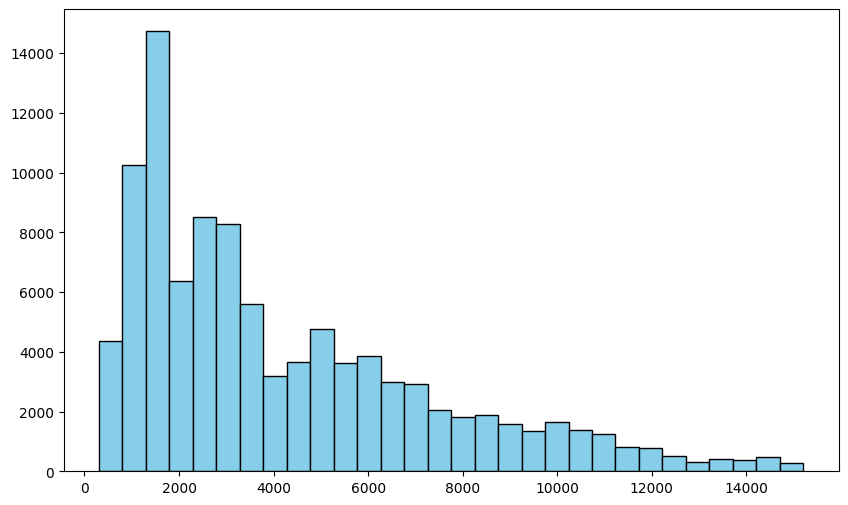

In [677]:
plt.figure(figsize=(10, 6))
plt.hist(df["Monthly_Inhand_Salary"], bins=30, color='skyblue', edgecolor='black')
plt.show()


In [678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [679]:
df["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64

In [680]:
df.loc[df["Num_Bank_Accounts" ] < 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
30330,0xc7b8,CUS_0x4f2a,March,Margaretf,39,807-03-5415,Engineer,12830576.0,10434.146667,-1,6,1,2_,"Auto Loan, and Not Specified",5,3,9.49,6.0,Good,1151.7,40.586736,22 Years and 5 Months,No,196.587321,230.9223857499363,High_spent_Large_value_payments,855.9049597507532,Standard,3
30331,0xc7b9,CUS_0x4f2a,April,Margaretf,40,#F%$D@*&8,Engineer,12830576.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",5,6,14.49,6.0,Good,1151.7_,39.369401,22 Years and 6 Months,No,196.587321,524.3044177743545,Low_spent_Large_value_payments,592.522927726335,Good,4
30332,0xc7ba,CUS_0x4f2a,May,Margaretf,40,807-03-5415,Engineer,12830576.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",1,8,9.49,6.0,Good,1151.7,28.702053,22 Years and 7 Months,No,196.587321,150.0966753535676,High_spent_Large_value_payments,936.7306701471217,Good,5
30333,0xc7bb,CUS_0x4f2a,June,Margaretf,40,807-03-5415,Engineer,12830576.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",5,6,9.49,6.0,Good,1151.7,34.808390,22 Years and 8 Months,No,196.587321,1006.6980690205388,Low_spent_Medium_value_payments,120.12927648015079,Good,6
30334,0xc7bc,CUS_0x4f2a,July,Margaretf,40,807-03-5415,Engineer,12830576.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",9,3,9.49,6.0,Good,1151.7,35.206427,NaN,No,42850.000000,172.99202124673786,High_spent_Large_value_payments,913.8353242539515,Good,7
30335,0xc7bd,CUS_0x4f2a,August,Margaretf,40,807-03-5415,Engineer,221369200.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",10,6,9.49,6.0,_,1151.7,38.278518,22 Years and 10 Months,No,196.587321,338.67230317776176,High_spent_Medium_value_payments,758.1550423229277,Good,8
43689,0x115ff,CUS_0xa878,February,Douwe Miedemaz,54,300-54-4627,Engineer,11785107.0,9870.922500,-1,6,7,0,NaN,27,1,4.97,1.0,Good,607.78,37.286105,20 Years and 6 Months,No,0.000000,668.1444536762707,!@9#%8,588.9477963237292,Poor,2
43690,0x11600,CUS_0xa878,March,Douwe Miedemaz,54,300-54-4627,Engineer,11785107.0,9870.922500,-1,6,7,0,NaN,27,1,0.9699999999999998,1.0,Good,607.78,41.915627,20 Years and 7 Months,No,0.000000,142.31978881674561,High_spent_Large_value_payments,1084.7724611832548,Poor,3
43691,0x11601,CUS_0xa878,April,Douwe Miedemaz,54,300-54-4627,Engineer,11785107.0,9870.922500,-1,6,7,0,NaN,27,1,4.97,1.0,Good,607.78,41.799942,20 Years and 8 Months,No,0.000000,467.563922615828,High_spent_Small_value_payments,779.528327384172,Poor,4
43692,0x11602,CUS_0xa878,May,Douwe Miedemaz,54,300-54-4627,Engineer,11785107.0,9870.922500,-1,6,7,0,NaN,25,2,2.97,1.0,Good,607.78,46.244581,20 Years and 9 Months,No,0.000000,NaN,High_spent_Large_value_payments,1037.5063384360787,Poor,5


In [681]:
num_bank_account_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Num_Bank_Accounts'] <= 0)]) # agrupando pelo costumerID e verificando quais possuem valores nulos
index_bank_account_null = num_bank_account_null.droplevel(-1).index #pegando os customer_id

C:\Users\vinic\AppData\Local\Temp\ipykernel_11160\219030965.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  num_bank_account_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Num_Bank_Accounts'] <= 0)]) # agrupando pelo costumerID e verificando quais possuem valores nulos


In [682]:
filtered_df = df[df['Customer_ID'].isin(index_bank_account_null)] # pegando apenas os dados que possuem o customer_id contido na variavel num_bank_account_null
filtered_df


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
48,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,1313134.0,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,2.0,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good,1
49,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,1313134.0,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",-1,2,15.34,4.0,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good,2
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,1313134.0,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,4.0,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good,3
51,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,1313134.0,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good,4
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,1313134.0,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,4,9.34,4.0,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,98,340-85-7301,Lawyer,4290379.0,3468.315833,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard,4
99964,0x25fba,CUS_0x372c,May,Lucia Mutikanik,18,340-85-7301,Lawyer,4290379.0,3468.315833,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good,5
99965,0x25fbb,CUS_0x372c,June,Lucia Mutikanik,19,340-85-7301,Lawyer,4290379.0,3468.315833,0,4,6,1,Not Specified,14,-1,5.1,1.0,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good,6
99966,0x25fbc,CUS_0x372c,July,Lucia Mutikanik,19,340-85-7301,Lawyer,4290379.0,3468.315833,0,4,6,1,Not Specified,14,NaN,5.1,1.0,Good,1079.48,35.123480,28 Years and 7 Months,No,34.975457,240.87379807398983,Low_spent_Medium_value_payments,350.982329,Good,7


In [683]:
count_per_customer_id = filtered_df['Customer_ID'].value_counts() #pegar a quantidade de customer_id para realizar o replace
count_per_customer_id

Customer_ID
CUS_0x284a    8
CUS_0x3cc2    8
CUS_0x7d80    8
CUS_0x78cd    8
CUS_0x89e3    8
             ..
CUS_0x76ed    8
CUS_0x59b6    8
CUS_0xa96d    8
CUS_0x40a3    8
CUS_0x372c    8
Name: count, Length: 563, dtype: int64

In [684]:
df.loc[df['Customer_ID'].isin(index_bank_account_null) & (df['Num_Bank_Accounts'] <= 0), 'Num_Bank_Accounts'] = df['Customer_ID'].map(count_per_customer_id) 
# verificando se o customer_id está contido na lista dos index que possuem valores nulos de conta.
# pegando os dados que estão nulos da coluna num_bank_accounts
# realizando a substituição batendo o index com a coluna Customer_id utilizando a função map, passando os valores com a quantidade total de registros para o id.

In [685]:
df.groupby('Customer_ID').apply(lambda x: x[(x['Num_Bank_Accounts'] <= 0)]) # verificando se os dados foram substituidos.

C:\Users\vinic\AppData\Local\Temp\ipykernel_11160\1185440196.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Customer_ID').apply(lambda x: x[(x['Num_Bank_Accounts'] <= 0)]) # verificando se os dados foram substituidos.


,,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [686]:
df.loc[df['Num_Bank_Accounts'] >= 100, 'Num_Bank_Accounts'] =  df['Num_Bank_Accounts'].mode().iloc[0] # como são poucos os dados discrepantes, vou trazer para a média

In [687]:
df.loc[df["Num_Bank_Accounts"]]["Num_Bank_Accounts"].value_counts()
# df.loc[df["Num_Bank_Accounts"]]["Num_Bank_Accounts"].value_counts().sum()

Num_Bank_Accounts
3    70876
2    29076
7       15
8       10
4        9
1        7
5        5
6        2
Name: count, dtype: int64

In [688]:
df.loc[df["SSN"].str.contains(r'[a-zA-Z]', regex=True)] # verificando dados inconsistentes 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,8
29,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,Entrepreneur,3068989.0,2612.490833,2,5,4,1,Not Specified,5,6,-3.01,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard,6
51,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,1313134.0,10469.207759,8,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good,4
54,0x1650,CUS_0x284a,July,Nadiaq,34,#F%$D@*&8,Lawyer,109094270.0,10469.207759,8,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good,7
98,0x1694,CUS_0x3e45,March,Harriet McLeodd,35,#F%$D@*&8,Entrepreneur,5439216.0,4766.680000,6,4,14,3,"Not Specified, Student Loan, and Personal Loan",15,11,5.54,3.0,_,179.22,31.258928,27 Years and 0 Months,NM,124.392082,33.349568589344514,High_spent_Large_value_payments,558.9263489897351,Standard,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99914,0x25f70,CUS_0x1619,March,Phil Wahbao,54,#F%$D@*&8,Media_Manager,2005998.0,1523.665000,8,5,360,4,"Home Equity Loan, Payday Loan, Not Specified, ...",25,9,2.97,3.0,Good,909.01,29.204711,16 Years and 5 Months,No,45.076827,111.56713873012444,Low_spent_Large_value_payments,265.722534,Poor,3
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,#F%$D@*&8,Developer,2262079.0,1722.065833,6,2,9,0,NaN,27,17,1.3099999999999996,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor,7
99946,0x25fa0,CUS_0x51b3,March,Ryana,33,#F%$D@*&8,Media_Manager,5914636.0,4908.863333,2,5,6,1,Personal Loan,8,7,6.68,2.0,Good,418.03,35.750925,20 Years and 3 Months,No,26.778419,188.54469705568923,High_spent_Medium_value_payments,525.563217,Standard,3
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,#F%$D@*&8,Media_Manager,1668035.0,1528.029167,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",4,0,5.69,4.0,Good,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good,1


In [689]:
df.loc[df["SSN"].str.contains(r'[a-zA-Z]', regex=True), 'SSN'] = np.nan # transformando em nulos para facilitar a manipulação

In [690]:
df['SSN'] = df.groupby('Customer_ID')['SSN'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill')) # agrupando pelo customer_id e alterando o valor nulo.

C:\Users\vinic\AppData\Local\Temp\ipykernel_11160\1463551064.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SSN'] = df.groupby('Customer_ID')['SSN'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill')) # agrupando pelo customer_id e alterando o valor nulo.


In [691]:
df.loc[df["SSN"].isna()] # verificando os dados

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [693]:
df.loc[df["Num_Credit_Card"] <= 0]["Num_Credit_Card"].value_counts() # verificando dados nulos

Num_Credit_Card
0    13
Name: count, dtype: int64

In [694]:
df.loc[df["Num_Credit_Card"] <= 0, "Num_Credit_Card"] = 1

In [695]:
df.loc[df["Num_Credit_Card"] <= 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [696]:
df.loc[df["Num_Credit_Card"], 'Num_Credit_Card'].value_counts() # outliers

Num_Credit_Card
4       93110
1385     4860
5         602
7         350
3         337
6         276
8         149
9          95
1          68
10         65
2          33
11         13
1029        5
674         4
1299        3
1005        3
898         3
688         2
1297        2
848         2
488         2
518         2
943         2
1327        2
809         1
1315        1
1381        1
1130        1
169         1
514         1
932         1
262         1
183         1
1189        1
Name: count, dtype: int64

In [697]:
df.loc[df["Num_Credit_Card"] == 1385].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,3484784.0,3037.986667,2,1385,6,1,Credit-Builder Loan,3,-1,5.42,2.0,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard,3
36457,0xeb9f,CUS_0x4b89,February,Deepa Seetharamant,21,920-87-0240,Lawyer,8996265.0,740.688750,4,1385,19,2,"Personal Loan, and Home Equity Loan",25,19,16.07,NaN,Standard,2400.0,36.679664,14 Years and 10 Months,Yes,72950.000000,12.483870045892177,High_spent_Medium_value_payments,299.21329971865083,Standard,2
37578,0xf230,CUS_0x5859,March,Slaterd,38,278-10-7087,Accountant,2994355.0,2432.295833,4,1385,6,3,"Debt Consolidation Loan, Not Specified, and Pe...",4,4,11.1,3.0,Good,348.19,24.398053,NaN,No,62.416375,168.9678233462156,High_spent_Small_value_payments,271.8453850033591,Standard,3
65034,0x19310,CUS_0x7d44,March,ewich Noelv,49,285-06-1059,Entrepreneur,3468926.0,2608.771667,7,1385,18,-100,NaN,19,12,7.55,1.0,Standard,430.6,37.949224,27 Years and 0 Months,Yes,0.000000,220.57474957567916,!@9#%8,320.30241709098755,Standard,3


In [728]:
Q1 = df['Num_Credit_Card'].quantile(0.25) # primeiro quartil (pega os valores de 25% para baixo)
Q3 = df['Num_Credit_Card'].quantile(0.95) # terceiro quartil (pega os valores de 95% para baixo)
IQR = Q3 - Q1 # calcula a diferença entre o primeiro e o terceiro quartil

In [729]:
Q1

4.0

In [723]:
Q3

10.0

In [730]:
IQR

6.0

In [731]:
upper_bound = Q3 + 1.5 * IQR
upper_bound

19.0

In [703]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x:  ceil(upper_bound) if x > upper_bound else x)

In [704]:
df.loc[df["Interest_Rate"] <= 0] # verificando dados inconcistentes 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [705]:
df.loc[df["Interest_Rate"] > 30]['Interest_Rate'].value_counts() # verificando outliers.

Interest_Rate
32      1742
34      1502
33      1467
31      1457
3089       4
        ... 
2147       1
4995       1
1899       1
2120       1
5729       1
Name: count, Length: 1720, dtype: int64

In [706]:
df.loc[df["Interest_Rate"] > 30, 'Interest_Rate'] = df['Interest_Rate'].mode().iloc[0] # tratando com a moda.


In [707]:
df.loc[df["Interest_Rate"] > 30]['Interest_Rate'].value_counts() # verificando outliers.

Series([], Name: count, dtype: int64)

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [709]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [710]:
df.loc[~(df["Num_of_Loan"].str.isdigit())] # verficiar valores com algum caracter inválido

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
31,0x162d,CUS_0xb891,August,Jasond,55,072-31-6145,Entrepreneur,3068989.0,2612.490833,2,5,4,-100,Not Specified,4,9,1.99,4.0,Good,632.46,27.332515,17 Years and 10 Months,No,16.415452,125.61725053231268,High_spent_Small_value_payments,379.21638114119577,Standard,8
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,-100,NaN,5,12,2.58,4.0,Standard,943.86,23.462303,30 Years and 10 Months,Yes,0.000000,173.13865100158367,Low_spent_Medium_value_payments,392.1922656650829,Standard,3
37,0x1637,CUS_0x1cdb,June,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0_,NaN,5,15,2.58,4.0,Standard,943.86,29.217556,31 Years and 1 Months,Yes,0.000000,37.64363788963997,High_spent_Medium_value_payments,497.6872787770267,Standard,6
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,-100,NaN,1,15,2.58,4.0,Standard,943.86,25.862922,31 Years and 3 Months,Yes,0.000000,181.33090096186916,High_spent_Small_value_payments,364.00001570479753,Standard,8
53,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,1313134.0,10469.207759,8,1,8,-100,"Credit-Builder Loan, and Mortgage Loan",0,3_,11.34,4.0,Good,352.16,41.980170,31 Years and 0 Months,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99940,0x25f96,CUS_0xad4f,May,Sabina Zawadzkig,47,226-45-0652,Developer,2262079.0,1722.065833,7,3,9,0_,NaN,30,18,4.31,2.0,Standard,642.46,37.450793,29 Years and 7 Months,No,0.000000,141.895743423042,Low_spent_Large_value_payments,300.31084,Standard,5
99958,0x25fb0,CUS_0x2084,July,Ryanl,21,253-72-7758,Architect,3832139.0,3106.647859,4,4,3,4_,"Student Loan, Debt Consolidation Loan, Student...",11,10,-3.41,3.0,Good,678.57,28.360351,17 Years and 5 Months,No,362.072453,182.0676508529024,Low_spent_Large_value_payments,309.10612,Standard,7
99969,0x25fc3,CUS_0xf16,February,Maria Sheahanb,45,868-70-2218,Media_Manager,1668035.0,1528.029167,1,1,5,-100,"Payday Loan, Student Loan, Mortgage Loan, and ...",3,0,5.69,4.0,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good,2
99984,0x25fda,CUS_0x8600,January,Sarah McBridec,28,031-35-0942,Architect,2000288.0,1929.906667,10,8,29,5_,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",35,26,18.31,9.0,Bad,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.37067007268804,High_spent_Large_value_payments,328.655224,Poor,1


In [711]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'[^0-9]', '', regex=True) # retirando caracteres inválidos

In [712]:
df.loc[~(df["Num_of_Loan"].str.isdigit())] # verificando se funfou

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [713]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int) # conversão

In [714]:
df.loc[(df["Num_of_Loan"] <= 0) & (df["Type_of_Loan"].isna())] # está certo pois não houve nenhum tipo de empréstimo

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,5,NaN,2.58,4.0,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.0,276.72539431736266,!@9#%8,288.60552234930395,Standard,1
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,9,NaN,2.58,4.0,Standard,943.86,27.020360,30 Years and 9 Months,NM,0.0,74.44364104999623,High_spent_Medium_value_payments,460.88727561667037,Standard,2
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,1,15,2.58,4.0,_,943.86,28.924954,30 Years and 11 Months,Yes,0.0,96.78548508587444,High_spent_Medium_value_payments,438.5454315807922,Standard,4
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,9,17,2.58,4.0,_,943.86,41.776187,31 Years and 0 Months,Yes,0.0,62.72327834435009,High_spent_Small_value_payments,482.6076383223166,Standard,5
37,0x1637,CUS_0x1cdb,June,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,5,15,2.58,4.0,Standard,943.86,29.217556,31 Years and 1 Months,Yes,0.0,37.64363788963997,High_spent_Medium_value_payments,497.6872787770267,Standard,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,0x25f95,CUS_0xad4f,April,Sabina Zawadzkig,47,226-45-0652,Developer,2262079.0,1722.065833,7,3,9,0,NaN,27,19_,5.31,2.0,_,642.46,26.730863,29 Years and 6 Months,NM,0.0,205.75607405146,Low_spent_Small_value_payments,256.450509,Poor,4
99940,0x25f96,CUS_0xad4f,May,Sabina Zawadzkig,47,226-45-0652,Developer,2262079.0,1722.065833,7,3,9,0,NaN,30,18,4.31,2.0,Standard,642.46,37.450793,29 Years and 7 Months,No,0.0,141.895743423042,Low_spent_Large_value_payments,300.31084,Standard,5
99941,0x25f97,CUS_0xad4f,June,Sabina Zawadzkig,47,226-45-0652,Developer,2262079.0,1722.065833,7,3,9,0,NaN,27,18,5.31,2.0,Standard,642.46,27.699504,NaN,No,0.0,207.47345558788197,Low_spent_Small_value_payments,254.733128,Poor,6
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,226-45-0652,Developer,2262079.0,1722.065833,6,2,9,0,NaN,27,17,1.3099999999999996,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.0,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor,7


In [715]:
df.loc[df["Num_of_Loan"]]["Num_of_Loan"].value_counts() # outliers

Num_of_Loan
4      88829
1       6936
3       3950
2         69
0         57
6         46
7         29
5         28
8         23
100       20
9         13
Name: count, dtype: int64

In [716]:
df.loc[(df["Num_of_Loan"] >= 100), 'Num_of_Loan'] = df['Num_of_Loan'].mode().iloc[0]  # tratando com a moda.

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

In [718]:
#Not Specified - Type Loan!!